<a href="https://colab.research.google.com/github/muthumeenal12/PRODIGY_ML_01/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






# **Task-01**


*Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.*

In [129]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
cd "/content/drive/MyDrive/house-prices-advanced-regression-techniques/"

/content/drive/MyDrive/house-prices-advanced-regression-techniques


In [131]:
Data= pd.read_csv("train.csv")
#Data.dropna(inplace=True)
Data.duplicated().sum()

0

In [132]:
Data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [133]:
df=Data[['BedroomAbvGr','SalePrice','FullBath','GrLivArea']]
df.dtypes

BedroomAbvGr    int64
SalePrice       int64
FullBath        int64
GrLivArea       int64
dtype: object

In [134]:
Data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

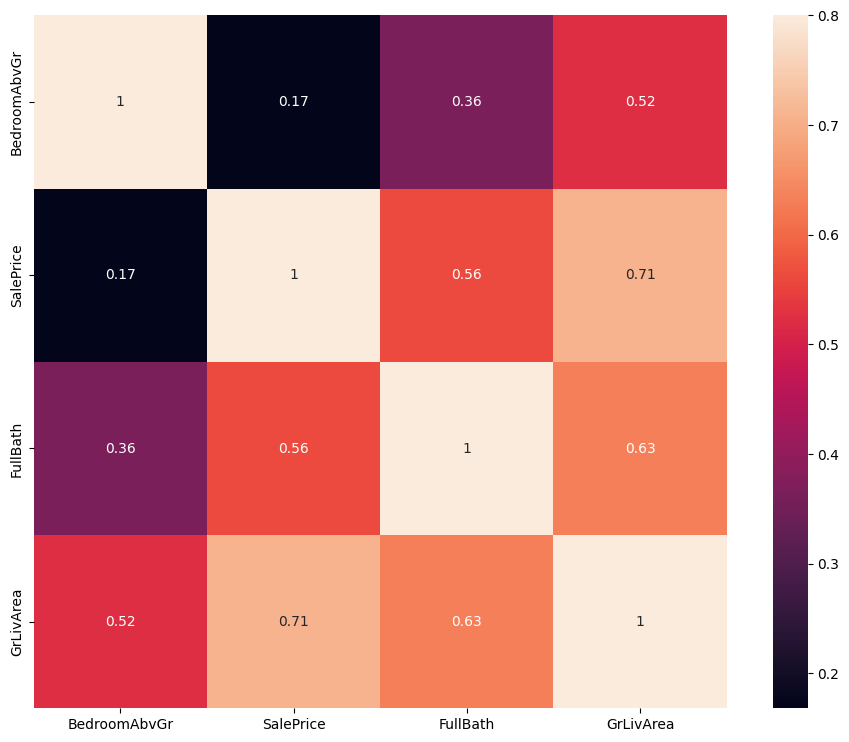

In [135]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

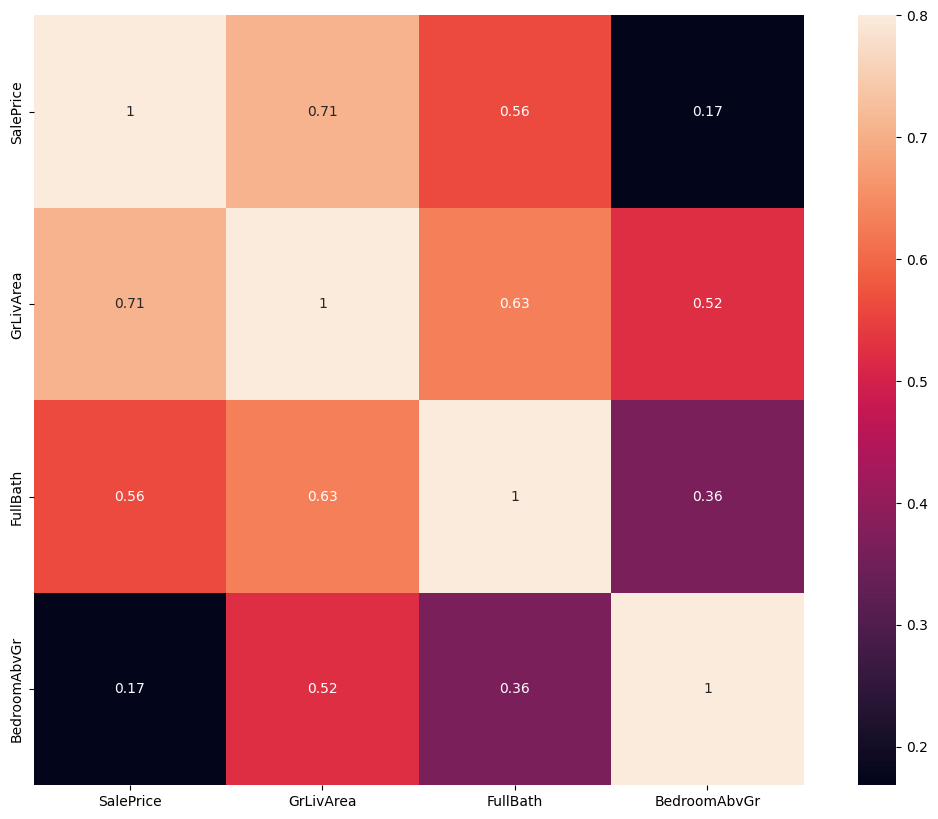

In [136]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df[cols].corr(), vmax=.8, square=True, annot=True);

In [137]:
Y= Data.SalePrice
X = Data.drop("SalePrice",axis=1)

In [138]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#**What we need from the given dataset?**


*   Square Footage
*   No. of Bathrooms
*   No. of Bedrooms



# **DATA DESCRIPTION:**
That we are employed

**GrLivArea**: Above grade (ground) living area square feet

**Bedroom:** Bedrooms above grade (does NOT include basement bedrooms)

**FullBath:** Full bathrooms above grade




In [139]:
X=Data[["GrLivArea","BedroomAbvGr","FullBath"]]
X

,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2
...,...,...,...
1455,1647,3,2
1456,2073,3,2
1457,2340,4,2
1458,1078,2,1


In [140]:
X.shape

(1460, 3)

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


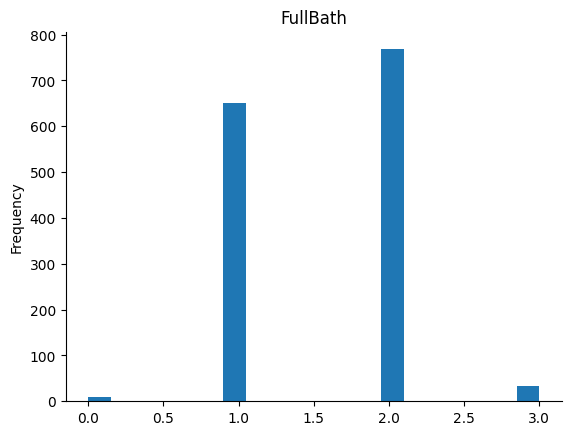

In [142]:
# @title FullBath

from matplotlib import pyplot as plt
X['FullBath'].plot(kind='hist', bins=20, title='FullBath')
plt.gca().spines[['top', 'right',]].set_visible(False)

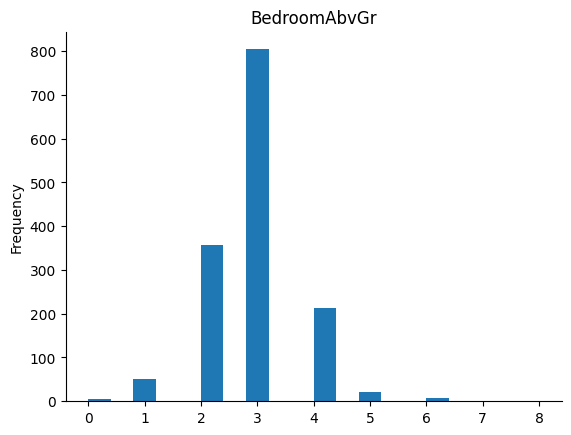

In [143]:

# @title BedroomAbvGr

from matplotlib import pyplot as plt
X['BedroomAbvGr'].plot(kind='hist', bins=20, title='BedroomAbvGr')
plt.gca().spines[['top', 'right',]].set_visible(False)

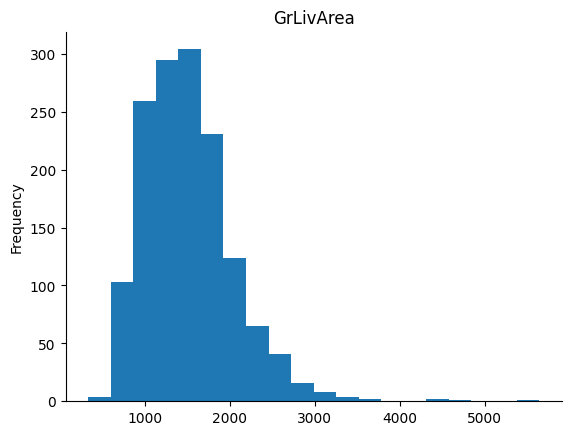

In [144]:
# @title GrLivArea

from matplotlib import pyplot as plt
X['GrLivArea'].plot(kind='hist', bins=20, title='GrLivArea')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-145-80ecf2786f7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y);


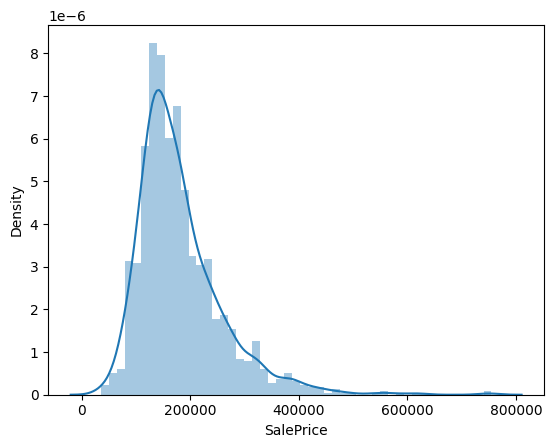

In [145]:
sns.distplot(Y);

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X, Y)

y_pred = model.predict(x_test)

In [147]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)

Mean Squared Error: 2739264768.0529118
Root Mean Squared Error: 52337.98589985014
Mean Absolute Error: 35752.83979820507
R-squared (R2): 0.6428750624078792


In [148]:
TESTD=pd.read_csv("test.csv")
X_test=TESTD[["GrLivArea","BedroomAbvGr","FullBath"]]

In [149]:
Y_preds=model.predict(X_test)

In [150]:
y=pd.DataFrame(Y_preds)
y.to_csv("Y_preds.csv")